#### Problem Statement:
##### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
##### Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 


Dataset Name - Company_Data.csv

In [1]:
## Importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,  classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
## Load the Dataset
data = pd.read_csv("D:/TopMentor_DS_course/Random Forest Project 9  10/Company_Data.csv")


In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
print("Columns in the Datasets: ", data.columns)

Columns in the Datasets:  Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')


In [5]:
print("Shape of the Dataset: ", data.shape)
print()
print("Information of Dataset")
print("====================================================")
data.info()

Shape of the Dataset:  (400, 11)

Information of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
print("Null Values in the Datsets: ", data.isnull().sum())

Null Values in the Datsets:  Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


In [7]:
median_sales = data['Sales'].median()

data['Sales_Category'] = np.where(
    data['Sales'] > median_sales, 'High', 'Low'
)

print("\nSales Category Distribution:")
print(data['Sales_Category'].value_counts())



Sales Category Distribution:
Sales_Category
Low     201
High    199
Name: count, dtype: int64


#### 🔍 Insight

No missing values present

Target column: Sales_Category (High, Low)

Most columns are numerical

👉 Why median?
It creates a balanced classification problem, improving model stability.

### Exploratory Data Analysis (EDA)

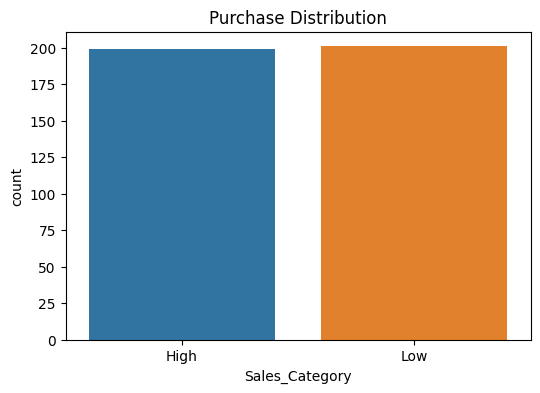

In [8]:
###  Distribution of Target Variable

plt.figure(figsize=(6,4))
sns.countplot(x='Sales_Category', data=data)
plt.title("Purchase Distribution")
plt.savefig("D:/TopMentor_DS_course/Random Forest Project 9  10/Company_Data_Graphs/Target_var Distribution.png")
plt.show()

#### 📌 Inference

Sales Category is evenly distributed 

It does not creates any imbalance in prediction

C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


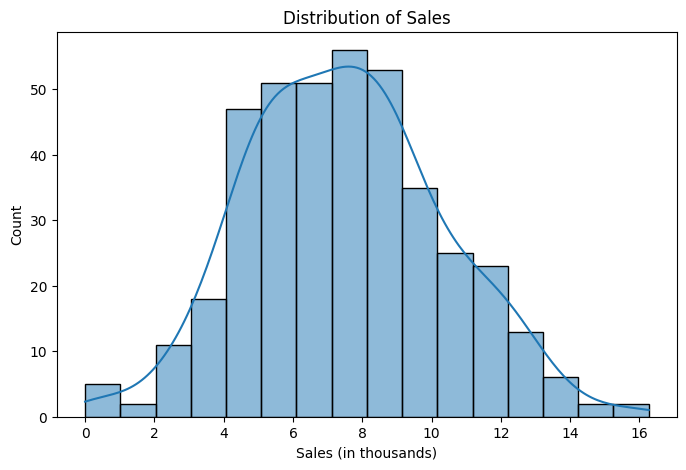

In [9]:
## Sales Distribution

plt.figure(figsize=(8,5))
sns.histplot(data['Sales'], kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales (in thousands)")
plt.ylabel("Count")
plt.savefig("D:/TopMentor_DS_course/Random Forest Project 9  10/Company_Data_Graphs/Sales Distribution.png")
plt.show()

#### Insight:

Sales are moderately right-skewed

Justifies binning into High/Low categories

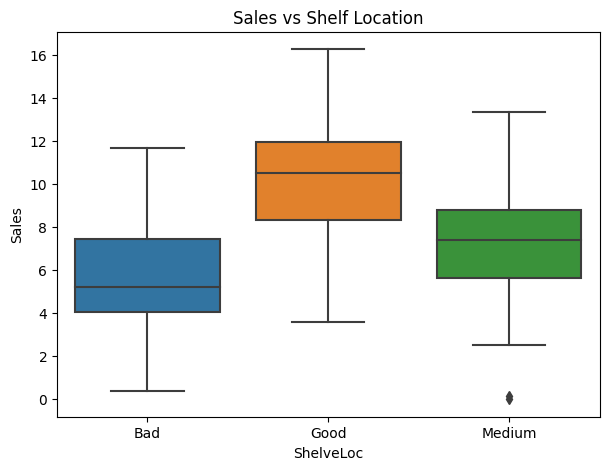

In [10]:
##Sales vs Shelf Location

plt.figure(figsize=(7,5))
sns.boxplot(x='ShelveLoc', y='Sales', data=data)
plt.title("Sales vs Shelf Location")
plt.savefig("D:/TopMentor_DS_course/Random Forest Project 9  10/Company_Data_Graphs/Sales vs Shelf Location.png")
plt.show()

#### Insight:

Good shelf location clearly drives higher sales

Shelf visibility is a critical business factor

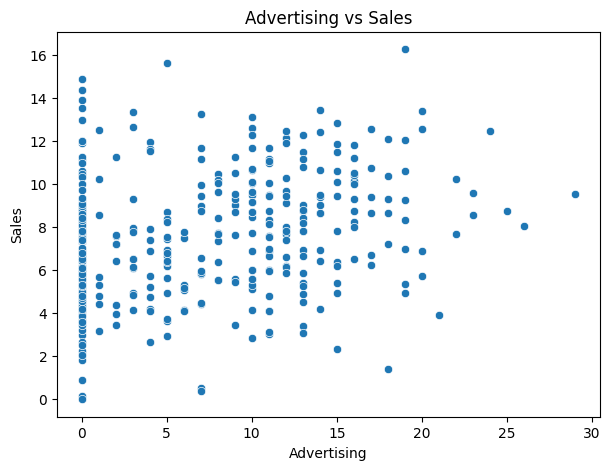

In [11]:
## Sales vs Advertising
plt.figure(figsize=(7,5))
sns.scatterplot(x='Advertising', y='Sales', data=data)
plt.title("Advertising vs Sales")
plt.savefig("D:/TopMentor_DS_course/Random Forest Project 9  10/Company_Data_Graphs/Sales vs Advertising.png")
plt.show()

#### Insight:

Strong positive relationship

Higher advertising → higher sales

## MODEL BUILDING

#### Feature Engineering

In [12]:
## Encode Categorical Variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = ['ShelveLoc', 'Urban', 'US']

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
    print(f"Encoded {col}")

Encoded ShelveLoc
Encoded Urban
Encoded US


In [13]:
## Features and Target Selection 

X = data.drop(['Sales', 'Sales_Category'], axis=1)
y = data['Sales_Category']

print("\nFeature Matrix Shape:", X.shape)
print("Target Variable Shape:", y.shape)


Feature Matrix Shape: (400, 10)
Target Variable Shape: (400,)


### Random Forest Classifier

In [14]:
## Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (320, 10)
Testing set size: (80, 10)


In [15]:
## Building Decision Tree model 

model = RandomForestClassifier(criterion='entropy',
    n_estimators=200,
    max_depth=8,
    random_state=42
)

model.fit(X_train, y_train)
print("\nRandom Forest Model Training Completed")


Random Forest Model Training Completed


In [16]:
## Model Evaluation & Validation

y_pred = model.predict(X_test)
print(y_pred)

['Low' 'Low' 'High' 'Low' 'High' 'Low' 'High' 'High' 'High' 'High' 'Low'
 'High' 'High' 'High' 'Low' 'High' 'Low' 'High' 'High' 'Low' 'High' 'Low'
 'High' 'Low' 'Low' 'Low' 'Low' 'High' 'Low' 'Low' 'High' 'High' 'Low'
 'Low' 'High' 'Low' 'Low' 'High' 'High' 'Low' 'Low' 'Low' 'High' 'High'
 'High' 'High' 'Low' 'High' 'Low' 'Low' 'High' 'High' 'Low' 'Low' 'High'
 'Low' 'Low' 'High' 'High' 'High' 'Low' 'High' 'Low' 'Low' 'High' 'High'
 'High' 'High' 'Low' 'High' 'Low' 'High' 'High' 'Low' 'High' 'High' 'High'
 'High' 'Low' 'High']


In [17]:
accuracy = accuracy_score(y_test, y_pred)

print("\nModel Accuracy:", round(accuracy, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.7875

Classification Report:
               precision    recall  f1-score   support

        High       0.80      0.81      0.80        43
         Low       0.78      0.76      0.77        37

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



In [18]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Important Features:\n")
print(feature_importance.head(10))



Top Important Features:

       Feature  Importance
4        Price    0.254379
6          Age    0.147935
0    CompPrice    0.122552
2  Advertising    0.104592
5    ShelveLoc    0.102633
3   Population    0.102271
1       Income    0.088374
7    Education    0.053204
8        Urban    0.012611
9           US    0.011449


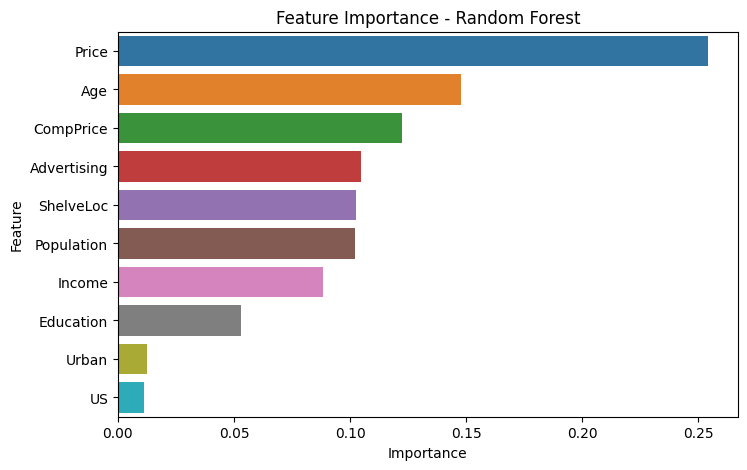

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance - Random Forest")
plt.show()


[[35  8]
 [ 9 28]]


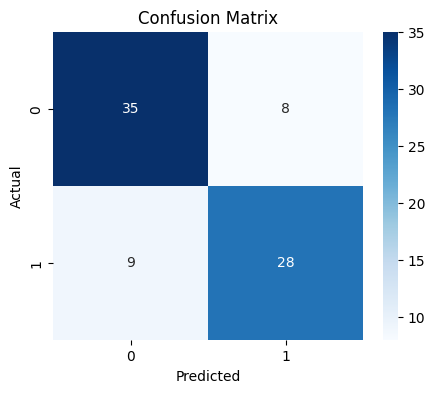

In [20]:
## Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 8️⃣ Inference & Business Insights
#### 🔍 Key Drivers of High Sales

##### Shelf Location

Most influential feature

Stores with Good shelf placement consistently show higher sales

##### Price

Strong negative impact

Competitive pricing is crucial

##### Advertising

Direct positive relationship with sales

Increased ad budget yields higher returns

##### Income Level

High-income regions tend to purchase more

Urban Stores

Urban locations generally perform better than rural

#### 📌 Final Business Recommendations

✅ Prioritize premium shelf placement in stores

✅ Optimize pricing against competitors

✅ Increase advertising spend in high-income & urban regions

✅ Use this model to predict high-potential store locations